## BlackFriday Dataset Analysis

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import sqlite3 as sql
import re
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
from IPython.display import Image
import statsmodels.api as sm
import statsmodels.formula.api as smf

<img src="workflow.jpg?2" width="750" height="650" align="center"/>

In the above diagram, I outline the data science process in general. Ideally, we start with **Step 0** which is identifying and framing a business decision problem. From here I'll define the rest of the steps 

 **1. Data is Collected** - Here we identify the data elements that should be collected to solve the business problem. Here we also consider the amount of time to collect the data, how much data is needed to make your experiment impactful, costs, benefits vs. cons. We should identify all the needed data before moving on and have a good understanding of the different data sources involved. 
 
 **2. Data is Processed** - Here we prepare the data and get into a format that can be used for further analysis. This step normally takes the longest as the data source(s) maybe in different formats. For example, you may have data from a legacy system stored in 20 different tables while you have data coming from a non-relational database.
 
 **3. Clean the Data Set** - This is where we start to identify missing values, duplicates, outliers, and other things that would affect the data quality. Just note that we should simply not delete the data without doing further research as that data may contain some value information. 
 
 **4. EDA** - This is also called exploratory data analysis. Here we create different plots and summarizations to identify patterns within the data. Just note if there are further issues identified within the data then we go back to **step 2**.

 **5. Model Building** - This step we fit appropriate models based on business problem and it is experimental meaning that there is no right way to go about this. While there are clear things you should not do such as introducing selection bias into your sample, no single model is correct. Just remember that all models are bad but there some better than others. 
 
 **6. Communicate, Visualize, Report Building** - Here we formulate our analysis from the prior steps into something that is presentable and is clear. It should be straight to the point while taking the audience into heavy consideration. Your analysis will be used to help drive a business decision.
 
I will be using this as a template for the rest of my analysis below.


### Business Problem

We will be using **Black Friday** dataset from Kaggle and the link is  <a href="https://www.kaggle.com/mehdidag/black-friday"> here</a> . Basically we are going to predict how much a customer will purchase based on prior purchase history. We will also use clustering and other methods to see if we can gain more insight about different customer groups. 

### 1.Data Collection

Since this dataset was already collected for us, we will list the data elements and descriptions below. 


|Name|Type|Description|
|---|---|---|
|User_ID |Id| User | 
|Product_ID | Id |  Product |
|Gender| Boolean| N/A   |
|Age| Age| Age of Customer |
|Occupation| Id |Occupation of each customer|
|City_Category | Category | N/A
|Stay_In_Current_City_Years | Integer | N/A
|Marital_Status|Category | N/A
|Product_Category_1| Category | N/A
|Product_Category_2| Category | N/A
|Product_Category_3| Category | N/A
|Purchase| Float| Purchase amount in dollar ( Target)

**Note 1** - Purchase is the dependent variable. 

 ### 2.Data is Processed 

Here the data is already in a format we want to analyze.

### 3. Clean the dataset

Here we check for missing values, outliers, etc.  The first thing we'll do is read in the data and print out the first few rows of the data. 

`data.head(n=5): ` This prints out the first 5 rows of the data

In [2]:
data=pd.read_csv("BlackFriday.csv",header=0)
data.head(n=5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


We already see in the first few rows that there are missing values. Let's see how much there is by looping each column and printing out the results by column.

**`sum(data[i].isnull())`** - This will add up the trues which is essentially represented as a 1 in programming. <br> 
**`data.shape`** - Returns a tuple of dimensions for the dataframe

In [3]:
for i in data.columns:
    print("In Column {0} there are {1:.1f}% missing values".format(i, sum(data[i].isnull())/data.shape[0]*100)) 

In Column User_ID there are 0.0% missing values
In Column Product_ID there are 0.0% missing values
In Column Gender there are 0.0% missing values
In Column Age there are 0.0% missing values
In Column Occupation there are 0.0% missing values
In Column City_Category there are 0.0% missing values
In Column Stay_In_Current_City_Years there are 0.0% missing values
In Column Marital_Status there are 0.0% missing values
In Column Product_Category_1 there are 0.0% missing values
In Column Product_Category_2 there are 31.1% missing values
In Column Product_Category_3 there are 69.4% missing values
In Column Purchase there are 0.0% missing values


In the print out above, we have some missing values especially with `Product_Category_2` and `Product_Category_3`. We will try to replace the missing values with a 0 since they are categorical. Also we will ensure that the column datatypes are accurate, as pandas does its best to guess the datatype and sometimes chooses the incorrect one. 

**`data.fillna(0,inplace=True)`** - Here replace all missing values with 0 and use inplace=True to return a copy of the same object. <br>
**`data.dtypes`** - This returns an series of the datatypes by column.

In [4]:
data.fillna(0,inplace=True)
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [5]:
data.dtypes
data["Product_Category_2"]=data["Product_Category_2"].astype("int64",copy=True)
data["Product_Category_3"]=data["Product_Category_3"].astype("int64",copy=True)
data["Gender"]=data["Gender"].map({"M":0,"F":1})
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                         int64
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

In terms of duplicates we'll have to assume that each transaction even though the same transaction is entirely possible. And outliers we can see how many observations fall outside $(Q_1-1.5*IQR, Q_3+1.5*IQR )$ where $Q_1$ is the 1st quartile and $Q_3$ is the 3rd quartile. This only works for numerical datatypes only. 

In [6]:
def outlier(x,lower_bd, upper_bd):
    if x>=lower_bd and x<=upper_bd:
        return 0 
    else:
        return 1
IQR=data["Purchase"].quantile(q=.75)-data["Purchase"].quantile(q=.25)
lower_bd=data["Purchase"].quantile(q=.25)-1.5*IQR
upper_bd=data["Purchase"].quantile(q=.75)+1.5*IQR
selection=data["Purchase"].apply(lambda x: outlier(x,lower_bd,upper_bd))
print("There are {0} potential outliers in column {1}".format(selection,"Purchase"))
data["Purchase"][selection==1].sort_values(ascending=True)[0:6]

There are 0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
537547    0
537548    0
537549    0
537550    0
537551    0
537552    0
537553    0
537554    0
537555    0
537556    0
537557    0
537558    0
537559    0
537560    0
537561    0
537562    0
537563    0
537564    0
537565    0
537566    0
537567    0
537568    0
537569    0
537570    0
537571    0
537572    0
537573    0
537574    0
537575    0
537576    0
Name: Purchase, Length: 537577, dtype: int64 potential outliers in column Purchase


473250    21384
114794    21384
133756    21385
509539    21386
503699    21386
241285    21386
Name: Purchase, dtype: int64

 ### 4. EDA

Now that the missing values are replaced, we'll start to explore the data. Pandas has a great function called `describe()` which will return the summary by column. 

Some observations here: 
1. The average purchase price is 9334 while the largest purchase is 23961. 
2. Roughly half the users are married.

In [7]:
data.describe()

,User_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.000000,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,0.245913,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,0.430627,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,0.000000,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,0.000000,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,0.000000,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,1.000000,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In the plot below, we first eliminate the duplicate users as some users are repeat buyers. From the bar plot below we see that that the male shoppers outnumber the female shoppers by more then twice. 

**Notes:** <br>
**`data[["User_ID","Gender"]].drop_duplicates()["Gender"]`** - We select the columns User_ID and Gender and drop the duplicates followed by selecting Gender which is last in the chain. <br> 

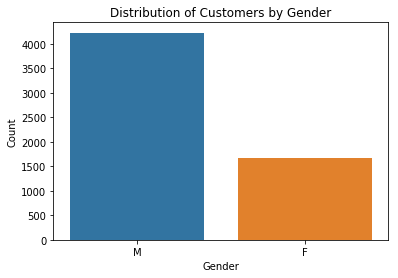

In [8]:
sns.countplot(data[["User_ID","Gender"]].drop_duplicates()["Gender"], order=[0,1])
plt.xticks([0,1],['M','F'])
plt.title("Distribution of Customers by Gender")
plt.ylabel("Count")
plt.show()

Below we see what the distribution of married couples are. The plot shows that more buyers are single then not. 

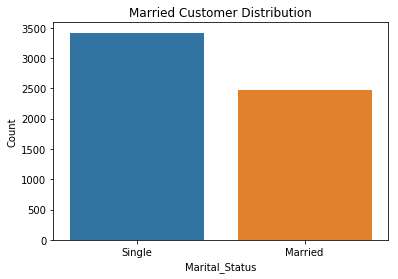

In [9]:
sns.countplot(data[["User_ID","Marital_Status"]].drop_duplicates()["Marital_Status"], order=[0,1])
plt.xticks([0,1],['Single','Married'])
plt.title("Married Customer Distribution")
plt.ylabel("Count")
plt.show()

Below we provide a summary of the total spent by males and females, and males spent roughly 3 times more the the females. 

In [10]:
smry_1=data[["Gender","Purchase"]].groupby("Gender").sum()
smry_1["Purchase"]=smry_1["Purchase"].apply(lambda x: "{:,}".format(x))
smry_1

,Purchase
Gender,
0,"3,853,044,357"
1,"1,164,624,021"


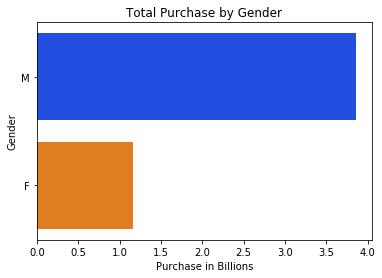

In [11]:
smry_1=data[["Gender","Purchase"]].groupby("Gender").sum()
sns.barplot(y=smry_1.index,x=smry_1["Purchase"]/1e9,orient="h",palette="bright")
plt.yticks([0,1],["M","F"])
plt.xlabel("Purchase in Billions")
plt.title("Total Purchase by Gender")
plt.show()

Next plot we will take a look at is a barchart of the amount of purchases by city. We see that in city category B had the most of amount of purchase volume. 

**Syntax**

**1.`sns.barplot(x=smry_2.index,y=smry_2["Purchase"]/1e9)`** - specify the x and y dimension where y is numerical. We divide the purchase to get the purchase in billions. <br>

**2.`smry_2["Purchase"].apply(lambda x: "{:,}".format(x))`** This will format the totals to include comma's. However this changes the data type to a string. 

City_Category
A    1,295,668,797
B    2,083,431,612
C    1,638,567,969
Name: Purchase, dtype: object


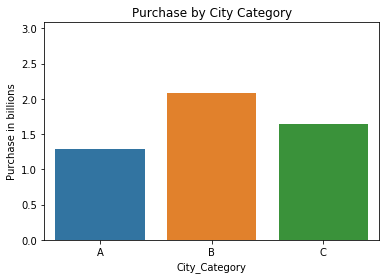

In [12]:
smry_2=data[["City_Category","Purchase"]].groupby("City_Category").sum()
print(smry_2["Purchase"].apply(lambda x: "{:,}".format(x)))

sns.barplot(x=smry_2.index,y=smry_2["Purchase"]/1e9)
plt.ylim(0,max(smry_2["Purchase"])/1e9+1)
plt.ylabel("Purchase in billions")
plt.title("Purchase by City Category")
plt.show()

In [13]:
smry_3=data[["City_Category","Gender","Purchase"]].groupby(["City_Category","Gender"]).sum()
smry_3=smry_3.reset_index()
smry_3

,City_Category,Gender,Purchase
0,A,0,995257521
1,A,1,300411276
2,B,0,1598118861
3,B,1,485312751
4,C,0,1259667975
5,C,1,378899994


Below we plot the amount in purchases by gender and city category. Males have more purchase volume then the females while the purchase volume for females across city category remains fairly constant except in City B which has slightly more then the others. 

**Syntax** <br>
**`1. sns.barplot(x=smry_3.City_Category,y=smry_3.Purchase/1e9,hue=smry_3.Gender, palette=["blue","gold"])`** - Here we specify the x and y axis. The `hue` argument is what we split the purchases by which is gender. The `palette` argument specifies the bar colors by city. <br> 

**`2. ax = plt.gca()`** - Here we specify this to get the axis of the current plot. <br>

**`3.leg.legendHandles[0].set_color('blue')`** - Here we specify the colors of each of the lines in the legend.  


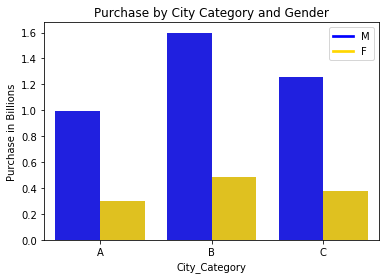

In [14]:
sns.barplot(x=smry_3.City_Category,y=smry_3.Purchase/1e9,hue=smry_3.Gender, palette=["blue","gold"])
plt.legend(labels=["M","F"])
plt.ylabel("Purchase in Billions")
plt.title("Purchase by City Category and Gender")
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('gold')
plt.show()

Next plot will be amount of purchase by age. We see from the plot below that individuals between 26 to 35 purchased the most. So the products are probably more towards the younger age group. 

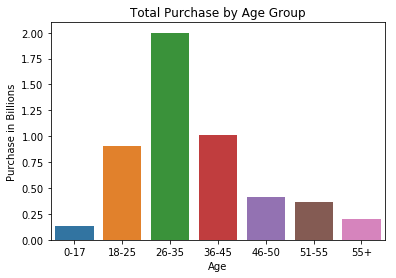

In [15]:
smry_4=data[["Age","Purchase"]].groupby("Age").sum()/1e9
smry_4=smry_4.reset_index()
sns.barplot(x="Age",y="Purchase",data=smry_4)
plt.title("Total Purchase by Age Group")
plt.ylabel("Purchase in Billions")
plt.show()

### 5. Model Building

The problem here is to be able to predict purchase price based on purchase history and demographic data. We will be using the **statsmodels** package to fit linear regression models. We first begin by creating the design matrix by dropping `User_ID` and `Product_ID` since these are probably not needed as well as `Purchase` which is stored in the target variable y. Also we will recode some categorical variables as statsmodels package needs all numerical variables. Lastly we will split the datasets into training and test sets using a 75/25 split. 

**Notation:**<br>
**1. `{j:i for i,j in zip(range(0,7), X["Age"].unique())}`** - Here we use dictionary comprehension to generate by the unique values in the age column to integers

**2.`X["City_Category"].map({j:i for i,j in zip(range(0,7), X["Age"].unique())}) `** - Here we are mapping the character values to integer values <br>

**3.`np.random.choice(range(0, X.shape[0]),math.floor(X.shape[0]*.75),replace=False)`** - We are going to use this to split the training and test sets using a 75/25 split.

**4. `X[~X.index.isin(indexes)].values`** - This is used to select only values not in the index for the test set. The ~ is the **not** operator in pandas.

In [16]:
X=data.drop(columns=["User_ID","Product_ID","Purchase"])
y=data["Purchase"]

#Recode age, City_Category
X["Age"]=X["Age"].map({j:i for i,j in zip(range(0,7), X["Age"].unique())})   
X["City_Category"]=X["City_Category"].map({j:i for i,j in zip(range(0,3), X["City_Category"].unique())})
X["Stay_In_Current_City_Years"]=X["Stay_In_Current_City_Years"].map(
    {j:i for i,j in zip(range(0,5), X["Stay_In_Current_City_Years"].unique())})
X.dtypes

#Split X and y into training and test sets
indexes=np.random.choice(range(0, X.shape[0]),int(np.floor(X.shape[0]*.75)),replace=False)
X_train=X.iloc[indexes,:].values
y_train=y[indexes].values
X_test=X[~X.index.isin(indexes)].values
y_test=y[~y.index.isin(indexes)].values

X_train=sm.add_constant(X_train) #add in the intercept
X_test=sm.add_constant(X_test)


Below we see that fitting all the variables results in a poor fit. Kurtosis is high as its above 3 indicating skewness in the fit. 

In [17]:
fit1=smf.OLS(y_train,X_train).fit()

In [18]:
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     6805.
Date:                Tue, 26 Mar 2019   Prob (F-statistic):               0.00
Time:                        06:14:35   Log-Likelihood:            -3.9761e+06
No. Observations:              403182   AIC:                         7.952e+06
Df Residuals:                  403172   BIC:                         7.952e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.04e+04     29.979    346.950      0.0

Below we plot the fitted values vs residuals to get an idea of the variance of the residuals. Generally it a good rule of thumb
to follow is between -3 to 3. Here we see that most of the points are way out side that range indicating sigificant issues to the constant variance assumption.

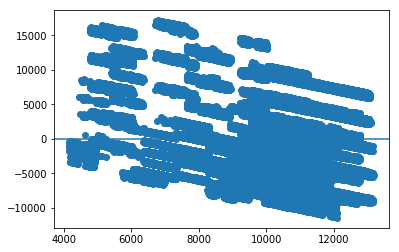

In [19]:
plt.scatter(fit1.fittedvalues,fit1.resid)
plt.axhline(y=0)
plt.show()

Here we use a different class to fit the model  or the **ols()** class which is the lower case version of the **Ols()** used above. This class allows the user to use **R** type notation to fit the model which is much easier to use in more complex models. Note that we use **C()** to represent the categorical variables in the model.  Here we see that the $R^2$ value has increased and the overall fit is significant. We will investigate later using foward selection and backward elimination techinques for variable selection as some are not significant. These can be dropped to simplify the model and lead to a better fit. This will be implemented outside direct use of a module.  

In [20]:
indexes=np.random.choice(range(0, X.shape[0]),int(np.floor(X.shape[0]*.75)),replace=False)
data_train=data.iloc[indexes,:]
data_test=data[~data.index.isin(indexes)]
fit2=smf.ols("Purchase~C(City_Category)+C(Gender)+C(Age)+C(Occupation)+C(Marital_Status)+C(Product_Category_1)+C(Product_Category_2)+C(Product_Category_3)+C(Stay_In_Current_City_Years)",data=data_train)
res=fit2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Purchase   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     8587.
Date:                Tue, 26 Mar 2019   Prob (F-statistic):               0.00
Time:                        06:14:50   Log-Likelihood:            -3.7997e+06
No. Observations:              403182   AIC:                         7.599e+06
Df Residuals:                  403098   BIC:                         7.600e+06
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

Now that we have recoded the variables lets fit a linear regression using all the variables. Below we show some of the several properties related to the model that we can get.  

**`res.conf_int().head(5)`** - Shows the first 5 confidence intervals for the first 5 parameters in the fitted model. Returns a dataframe. <br>
**`res.fittedvalues.head(5)`** - Shows the fitted values for the first 5 observations in dataset <br>
**`res.resid.head()`** - Shows the residuals for the 1st few observations. <br>
**Note** - There are many more properties that the fitted model has then is shown here.

In [35]:
print("AIC for fit 2 is: {0}".format(res.aic))
print("\n Fitted Model CIs \n")
print(res.conf_int().head(5))
print("\n Fitted Values \n")
print(res.fittedvalues.head(5))
print("\n Residuals \n")
print(res.resid.head())

AIC for fit 2 is: 7599499.627410517

 Fitted Model CIs 

                                  0             1
Intercept              13086.717392  13290.894726
C(City_Category)[T.B]    106.858089    153.083804
C(City_Category)[T.C]    513.304744    563.535174
C(Gender)[T.1]            44.877114     90.081487
C(Age)[T.18-25]         -290.278482   -104.596128

 Fitted Values 

94808      5765.488698
282883     8016.650785
362576     7924.264719
283492     7409.974963
327511    13474.368467
dtype: float64

 Residuals 

94808     1268.511302
282883    -181.650785
362576     -51.264719
283492     396.025037
327511    2033.631533
dtype: float64


### 6. Communicate, Visualize, Report Building

This is the last step in the project where we display our results. We can take this notebook and save it as a pdf and present it. The final model is given below along with the specifications. 